In [1]:
from Network_PER import *
from DriveSimTrace import *

pygame 2.1.2 (SDL 2.0.18, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
#시뮬레이션 테스트 코드
n_runs = 100
model = './models/q_20221017_concat_3'

#train_scores_1 = np.genfromtxt('20221003_concat_train_scores_1.csv', delimiter=',')

wins = 0
agent = Agent(lr=0.0005, gamma=0.99, n_actions=5, batch_size=64, epsilon=0.0, input_dims=[4, 6], per_on=False)

agent.load_model(model)

sim = DriveSimulator()
avg_score = 0.0
    
for i in range(n_runs):
    over = False
    sim.reset(frame_rate=30)

    state = sim.get_sim_state()
    while not over:
        #print(agent.choose_action(state))
        action, pred = agent.choose_action(state)
        state_, stpRwd, sim_over = sim.step(action)
        over = sim_over
        state = state_
        
    avg_score += sim.agtRwd
    if sim.agtRwd > 0:
        wins+=1
    time.sleep(0.5)

print(wins)

Use Prioritized Sampling: False


KeyboardInterrupt: 

In [2]:
#시뮬레이션 테스트 코드 (여러 번)
n_runs = 200

for idx in range(5):
    model = './models/q_20221016_concat_' + str(idx)

    wins = 0
    agent = Agent(lr=0.0005, gamma=0.99, n_actions=5, batch_size=64, epsilon=0.0, input_dims=[4, 6], per_on=False)

    agent.load_model(model)

    sim = DriveSimulator()
    avg_score = 0.0
        
    for i in range(n_runs):
        over = False
        sim.reset(frame_rate=300)

        state = sim.get_sim_state()
        while not over:
            #print(agent.choose_action(state))
            action, pred = agent.choose_action(state)
            state_, stpRwd, sim_over = sim.step(action)
            over = sim_over
            state = state_
            
        avg_score += sim.agtRwd
        if sim.agtRwd > 0:
            wins+=1

    print(idx, ' - ' , wins)

Use Prioritized Sampling: False
test
loaded weights from ./models/q_20221016_concat_0
0  -  200
Use Prioritized Sampling: False
test
loaded weights from ./models/q_20221016_concat_1
1  -  171
Use Prioritized Sampling: False
test
loaded weights from ./models/q_20221016_concat_2
2  -  200
Use Prioritized Sampling: False
test
loaded weights from ./models/q_20221016_concat_3
3  -  98
Use Prioritized Sampling: False
test
loaded weights from ./models/q_20221016_concat_4
4  -  162


No handles with labels found to put in legend.


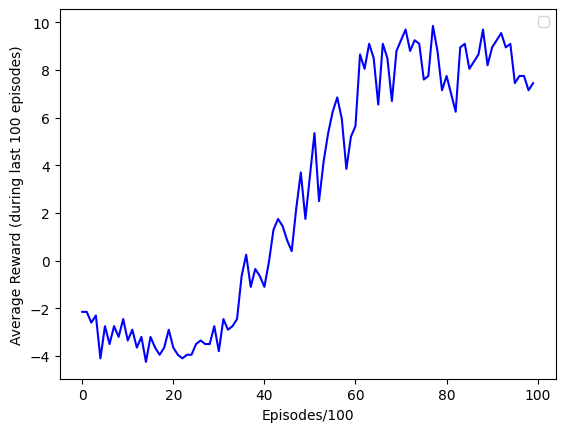

In [7]:
scores = np.genfromtxt('20221017_concat_train_scores.csv', delimiter=',')
scores = scores[4]

plt.plot(scores, 'b')

plt.xlabel('Episodes/100')
plt.ylabel('Average Reward (during last 100 episodes)')
plt.legend()

plt.savefig("learn_chart_20221017.png")